In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from utils import get_data

/tmp/ipykernel_510157/3376823894.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
# speed        = '7_0'
# speed        = '7_5'
# speed        = '8_0'
speed        = '8_5'
cma          = 'CMA_ES-08_01-13_51'
openai       = 'OPENAI_ES-08_01-14_03'
hgso         = 'HGSO-08_01-14_15'
pso          = 'PSO-08_01-14_39' 

## Obtem Dados

In [20]:
df_cma = get_data(cma, speed, drop_columns=True, only_valids=True, top_ten=True)
df_hgso = get_data(hgso, speed, drop_columns=True, only_valids=True, top_ten=True)
df_openai = get_data(openai, speed, drop_columns=True, only_valids=True, top_ten=True)
df_pso = get_data(pso, speed, drop_columns=True, only_valids=True, top_ten=True)

## Plota dados

In [17]:
save_figure  = True

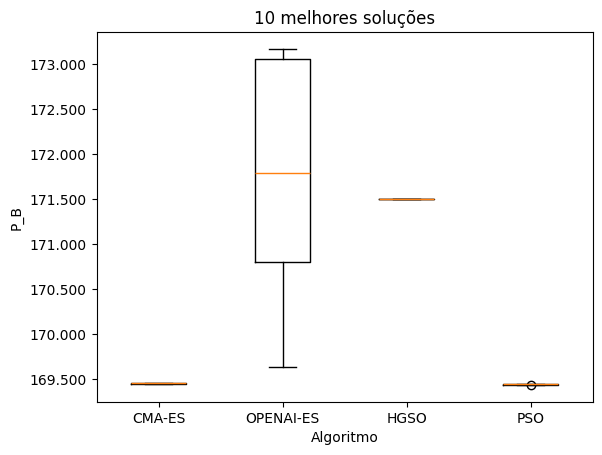

In [21]:
# Dados
data = [df_cma['P_B'], df_openai['P_B'], df_hgso['P_B'], df_pso['P_B']]

# Rótulos dos grupos
labels = ['CMA-ES', 'OPENAI-ES', 'HGSO', 'PSO']

# Plotar os dados
plt.boxplot(data, labels=labels)

# Formatar o eixo y para exibir três casas antes da vírgula e duas casas decimais
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.3f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Definir o título e os rótulos dos eixos
plt.title('10 melhores soluções')
plt.xlabel('Algoritmo')
plt.ylabel('P_B')

# Salva plot
if save_figure:
    plt.savefig('plots/compare_methods_' + speed + '.png')

# Exibir o gráfico
plt.show()